# Statistical analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [2]:
HC_baseline = pd.read_csv('./BASELINE/HC_baseline_full_ratings.csv')
DT_baseline = pd.read_csv('./BASELINE/DT_baseline_full_ratings.csv')

HC_imagebox = pd.read_csv('./IMAGE_BOX/HC_imagebox_full_ratings.csv')
DT_imagebox = pd.read_csv('./IMAGE_BOX/DT_imagebox_full_ratings.csv')

# Statistical analysis on Allsides bias rating:

#### No sources from the images boxes were rated in the Allsides bias rating dataset. Therefore comparisons between bias of baseline sources versus image box sources could not be performed.

# Statistical analysis on Facebook Study bias rating:

#### Hillary Clinton Image Box images versus Baseline images source bias according to Facebook bias ratings:

In [3]:
print("Baseline skew: ", stats.skew(HC_baseline.facebookbias_rating[HC_baseline.facebookbias_rating<3]))
print("Image Box skew: ", stats.skew(HC_imagebox.facebookbias_rating[HC_imagebox.facebookbias_rating<3]))

Baseline skew:  0.6465826147908966
Image Box skew:  -2.0119468573813823


* from the [stats page](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html#scipy.stats.skew) "For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking."

In [4]:
print("Baseline skew: ", stats.skewtest(HC_baseline.facebookbias_rating[HC_baseline.facebookbias_rating<3]))
print("Image Box skew: ", stats.skewtest(HC_imagebox.facebookbias_rating[HC_imagebox.facebookbias_rating<3]))

Baseline skew:  SkewtestResult(statistic=3.6907009512795517, pvalue=0.00022363693458296043)
Image Box skew:  SkewtestResult(statistic=-7.6651319218146634, pvalue=1.786474831933403e-14)


In [6]:
stats.ks_2samp(HC_baseline.facebookbias_rating[HC_baseline.facebookbias_rating<3], 
                               HC_imagebox.facebookbias_rating[HC_imagebox.facebookbias_rating<3])

Ks_2sampResult(statistic=0.30312750601443461, pvalue=2.6231146049493861e-08)

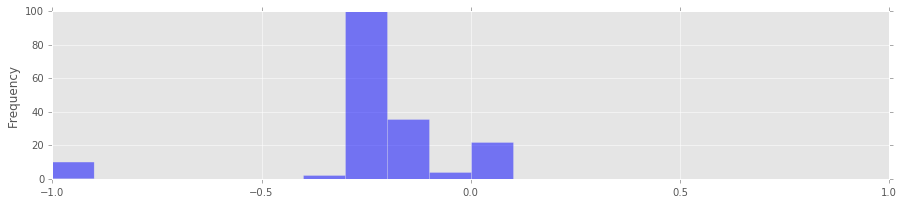

In [7]:
HC_imagebox.facebookbias_rating.plot.hist(alpha=0.5, bins=20, range=(-1,1), color='blue')

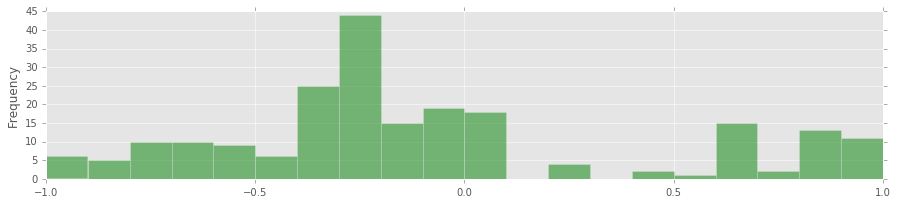

In [8]:
HC_baseline.facebookbias_rating.plot.hist(alpha=0.5, bins=20, range=(-1,1), color='green')

#### Donald Trump Image Box images versus Baseline images source bias according to Facebook bias ratings:

In [9]:
print("Baseline skew: ", stats.skew(DT_baseline.facebookbias_rating[DT_baseline.facebookbias_rating<3]))
print("Image Box skew: ", stats.skew(DT_imagebox.facebookbias_rating[DT_imagebox.facebookbias_rating<3]))

Baseline skew:  1.0682966325455876
Image Box skew:  1.1788621228138945


In [10]:
stats.ks_2samp(DT_baseline.facebookbias_rating[DT_baseline.facebookbias_rating<3], 
                               DT_imagebox.facebookbias_rating[DT_imagebox.facebookbias_rating<3])

Ks_2sampResult(statistic=0.29887106357694593, pvalue=1.0185147712160563e-07)

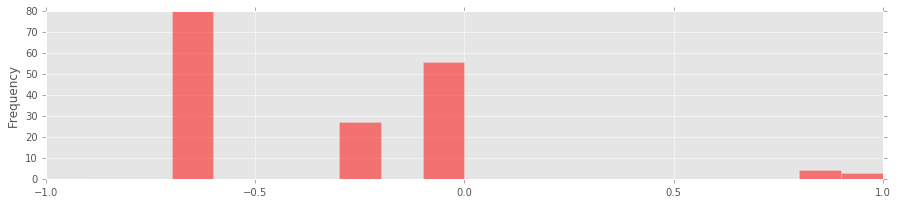

In [11]:
DT_imagebox.facebookbias_rating.plot.hist(alpha=0.5, bins=20, range=(-1,1), color='red')

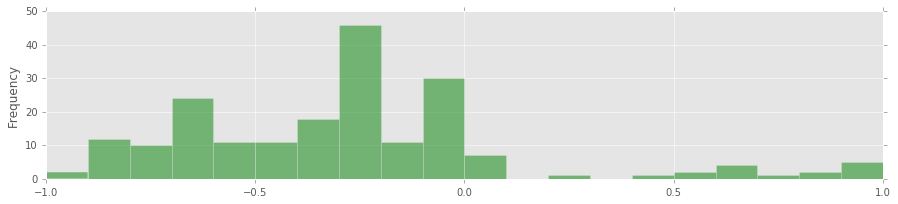

In [12]:
DT_baseline.facebookbias_rating.plot.hist(alpha=0.5, bins=20, range=(-1,1), color='green')

In [16]:
print("Number of missing ratings for Hillary Clinton Baseline data: ", len(HC_baseline[HC_baseline.facebookbias_rating == 999]))
print("Number of missing ratings for Hillary Clinton Image Box data: ", len(HC_imagebox[HC_imagebox.facebookbias_rating == 999]))
print("Number of missing ratings for Donald Trump Baseline data: ", len(DT_baseline[DT_baseline.facebookbias_rating == 999]))
print("Number of missing ratings for Donald Trump Image Box data: ", len(DT_baseline[DT_imagebox.facebookbias_rating == 999]))

Number of missing ratings for Hillary Clinton Baseline data:  138
Number of missing ratings for Hillary Clinton Image Box data:  163
Number of missing ratings for Donald Trump Baseline data:  100
Number of missing ratings for Donald Trump Image Box data:  134


/Users/jenniferstark/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


* The Kolmogorov-Smirnov analyis shows that the distribution of political representation across image sources is different between the baseline images and those found in the image box.

# Statistical analysis on Allsides + Facebook + MondoTimes + my bias ratings:

#### Convert strings to integers:

In [17]:
def convert_to_ints(col):
    if col == 'Left':
        return -1
    elif col == 'Center':
        return 0
    elif col == 'Right':
        return 1
    else:
        return np.nan

In [18]:
HC_imagebox['final_rating_ints'] = HC_imagebox.final_rating.apply(convert_to_ints)
DT_imagebox['final_rating_ints'] = DT_imagebox.final_rating.apply(convert_to_ints)
HC_baseline['final_rating_ints'] = HC_baseline.final_rating.apply(convert_to_ints)
DT_baseline['final_rating_ints'] = DT_baseline.final_rating.apply(convert_to_ints)

In [19]:
HC_imagebox.final_rating_ints.value_counts()

-1    221
 1     75
 0     41
Name: final_rating_ints, dtype: int64

In [20]:
DT_imagebox.final_rating_ints.value_counts()

-1    172
 0     71
 1     65
Name: final_rating_ints, dtype: int64

#### Prepare data for chi squared test

In [21]:
HC_baseline_counts = HC_baseline.final_rating.value_counts()
HC_imagebox_counts = HC_imagebox.final_rating.value_counts()
DT_baseline_counts = DT_baseline.final_rating.value_counts()
DT_imagebox_counts = DT_imagebox.final_rating.value_counts()

In [23]:
HC_baseline_counts.head()

Left                    145
Center                   92
Right                    75
Unknown / unreliable     41
Name: final_rating, dtype: int64

In [24]:
normalised_bias_ratings = pd.DataFrame({'HC_ImageBox':HC_imagebox_counts,
                                       'HC_Baseline' : HC_baseline_counts,
                                       'DT_ImageBox': DT_imagebox_counts,
                                       'DT_Baseline': DT_baseline_counts} )

In [25]:
normalised_bias_ratings

,DT_Baseline,DT_ImageBox,HC_Baseline,HC_ImageBox
Center,88,71.0,92,41.0
Left,154,172.0,145,221.0
Right,33,65.0,75,75.0
Unknown / unreliable,23,NaN,41,NaN


#### Remove `Unknown / unreliable` row

In [26]:
normalised_bias_ratings = normalised_bias_ratings[:3]

#### Calculate percentages for plotting purposes

In [27]:
normalised_bias_ratings.loc[:,'HC_Baseline_pcnt'] = normalised_bias_ratings.HC_Baseline/normalised_bias_ratings.HC_Baseline.sum()*100
normalised_bias_ratings.loc[:,'HC_ImageBox_pcnt'] = normalised_bias_ratings.HC_ImageBox/normalised_bias_ratings.HC_ImageBox.sum()*100
normalised_bias_ratings.loc[:,'DT_Baseline_pcnt'] = normalised_bias_ratings.DT_Baseline/normalised_bias_ratings.DT_Baseline.sum()*100
normalised_bias_ratings.loc[:,'DT_ImageBox_pcnt'] = normalised_bias_ratings.DT_ImageBox/normalised_bias_ratings.DT_ImageBox.sum()*100

/Users/jenniferstark/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jenniferstark/anaconda/lib/python3.4/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
normalised_bias_ratings

,DT_Baseline,DT_ImageBox,HC_Baseline,HC_ImageBox,HC_Baseline_pcnt,HC_ImageBox_pcnt,DT_Baseline_pcnt,DT_ImageBox_pcnt
Center,88,71.0,92,41.0,29.487179,12.166172,32.0,23.051948
Left,154,172.0,145,221.0,46.474359,65.578635,56.0,55.844156
Right,33,65.0,75,75.0,24.038462,22.255193,12.0,21.103896


In [31]:
normalised_bias_ratings.columns

Index(['DT_Baseline', 'DT_ImageBox', 'HC_Baseline', 'HC_ImageBox', 'HC_Baseline_pcnt', 'HC_ImageBox_pcnt', 'DT_Baseline_pcnt', 'DT_ImageBox_pcnt'], dtype='object')

In [33]:
HC_percentages = normalised_bias_ratings[['HC_Baseline_pcnt', 'HC_ImageBox_pcnt']]
DT_percentages = normalised_bias_ratings[['DT_Baseline_pcnt', 'DT_ImageBox_pcnt']]

#### Test Hillary Clinton Image Box images against Baseline images:

In [29]:
stats.chisquare(f_exp=normalised_bias_ratings.HC_Baseline, 
               f_obs=normalised_bias_ratings.HC_ImageBox)

Power_divergenceResult(statistic=68.106221889055462, pvalue=1.6252561764176373e-15)

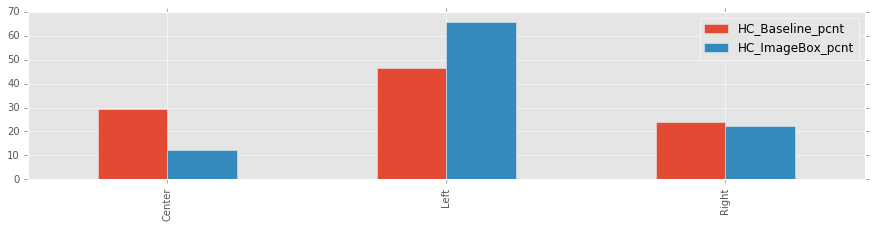

In [34]:
HC_percentages.plot.bar()

#### Test Donald Trump Image Box images against Basline images:

In [30]:
stats.chisquare(f_exp=normalised_bias_ratings.DT_Baseline, 
               f_obs=normalised_bias_ratings.DT_ImageBox)

Power_divergenceResult(statistic=36.418290043290042, pvalue=1.235574102398194e-08)

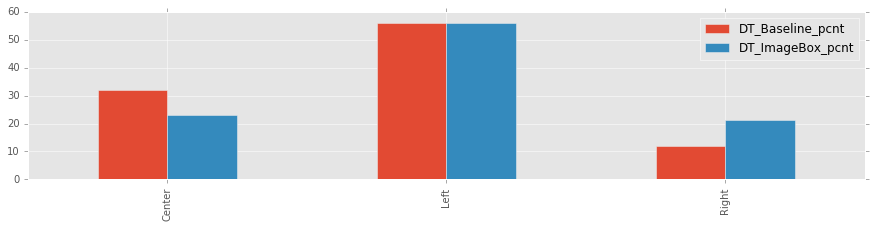

In [35]:
DT_percentages.plot.bar()

* Chi square test shows that the distribution of political representation across image sources is different between the baseline images and those found in the image box both candidates.
* Hillary Clinton image box images increased left-leaning and decreased centrist source representation compared with baseline. 
* Donald Trump image box images increased right-leaning, and decreased centrist source representation compared with baseline.

# Conclusion:
Using Google as its own baseline was sufficient to conclude that representation on the main results page is different from that in the baseline, indicating that bias is introduced in the curation of images for the image box.